 # EDA
 

In [2]:
"""
ADHD Prediction Dataset - Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the preprocessed 
ADHD dataset to understand feature distributions, relationships, and data quality 
before model training.

Project: ADHD Sex Prediction
Input: Preprocessed dataset from Data Preparation module
Output: EDA insights and visualizations for model development
"""

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# =============================================================================
# CONFIGURATION AND SETTINGS
# =============================================================================

# Set plotting style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Figure settings
FIGURE_SIZE = (12, 8)




In [4]:
# =============================================================================
# DATA LOADING AND INITIAL INSPECTION
# =============================================================================

def load_and_inspect_data():
    """
    Load preprocessed dataset and perform initial inspection.
    
    Returns:
    --------
    pd.DataFrame
        Loaded and validated dataset
    """
    
    
    # Load preprocessed data
    data_path = r"C:\Users\04ama\OneDrive\chemistry\ADHD_SEX_Prediction\data\preprocessed data\balanced_train_data.csv"
  
    
    try:
        df = pd.read_csv(data_path)
       
        
        return df
        
    except FileNotFoundError:
        print(f"   ❌ Error: Dataset not found at {data_path}")
        raise
    except Exception as e:
        print(f"   ❌ Error loading dataset: {str(e)}")
        raise

# Load the dataset
df = load_and_inspect_data()

STEP 4: Quantitative Features Analysis
----------------------------------------

Statistical Summary:
       EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial
count        815.000               815.000         815.000         815.000          815.000          815.000         815.000         815.000                   815.000                     815.000                     815.000                815.000                    815.000                815.000                815.000                815.000            815.000
mean          -0.032                 0.013          -0.034          -0.045            0.048           -0.030           0.005           0.030                    -0.087          

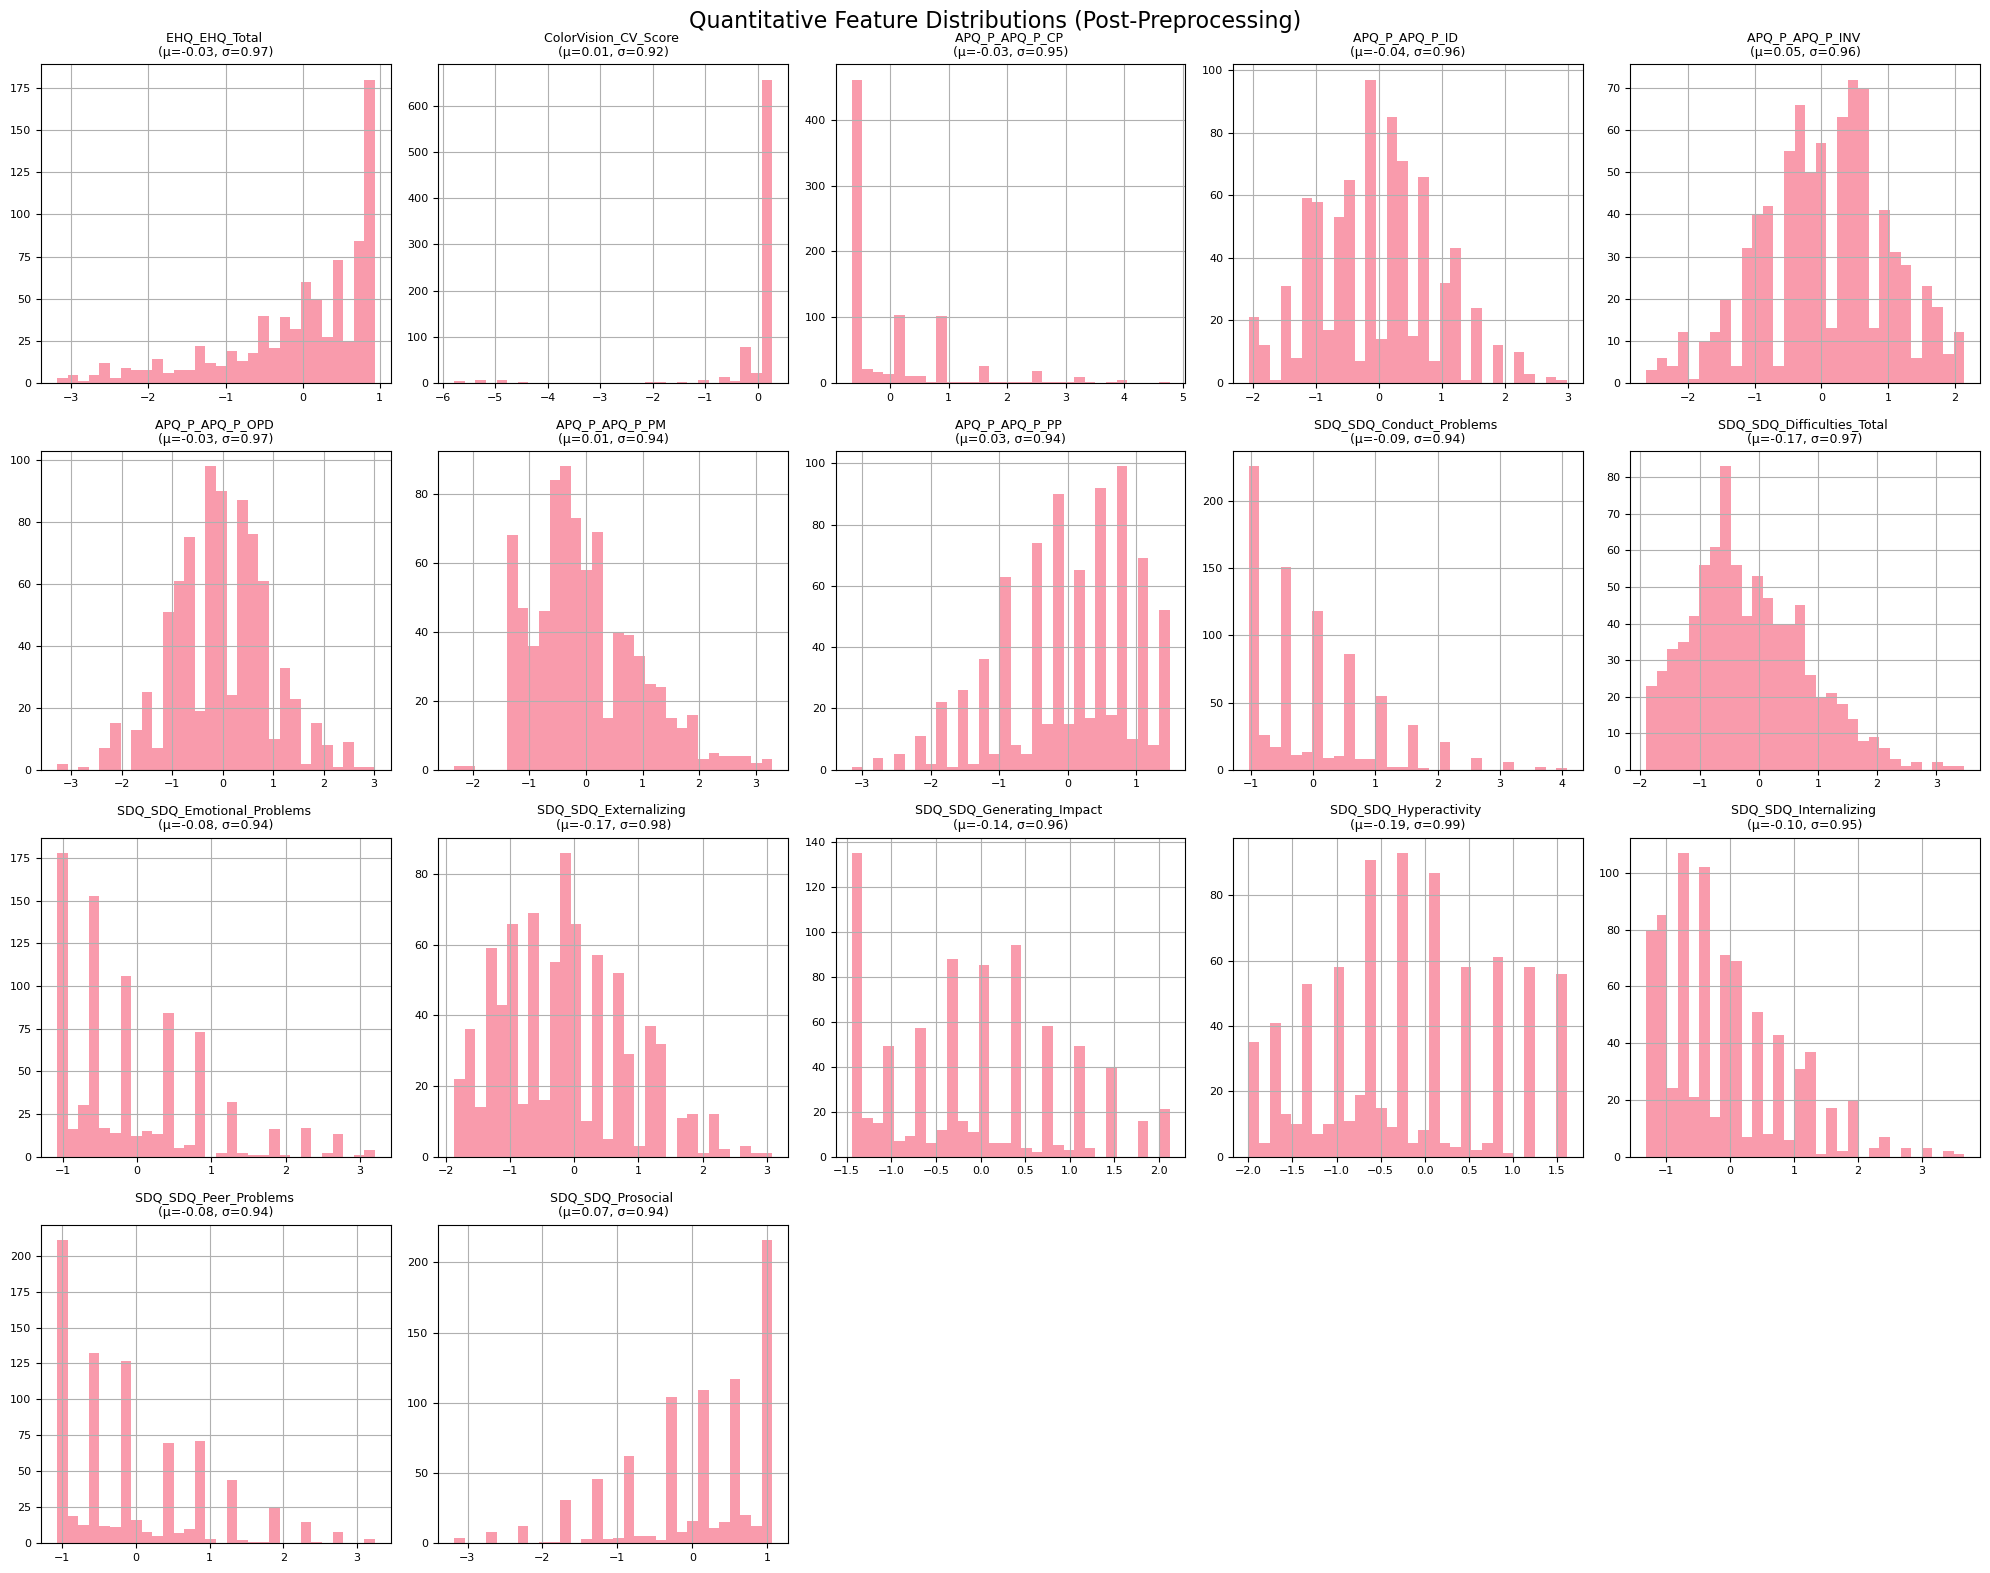

In [5]:
# =============================================================================
# QUANTITATIVE FEATURES ANALYSIS
# =============================================================================

def analyze_quantitative_features(df):
    """
    Analyze distribution and statistical characteristics of quantitative features.

    Purpose:
    --------
    This function:
    - Identifies numerical (standardized) features in the dataset.
    - Prints descriptive statistics (mean, std, min, max, percentiles).
    - Verifies standardization of features (mean ~ 0, std ~ 1).
    - Plots histograms for up to 20 quantitative features to inspect distributions.

    Parameters:
    -----------
    df : pd.DataFrame
        Dataset containing engineered and standardized features.
    """
    print("STEP 4: Quantitative Features Analysis")
    print("-" * 40)

    # Identify quantitative columns based on known prefixes (used in your preprocessing)
    quant_cols = [
        col for col in df.columns 
        if any(col.startswith(prefix) for prefix in ['APQ_', 'SDQ_', 'EHQ_', 'ColorVision'])
    ]

    if not quant_cols:
        print("No quantitative columns found matching expected prefixes.")
        return

    # ==============================
    # 1. Statistical Summary
    # ==============================
    print("\nStatistical Summary:")
    summary_stats = df[quant_cols].describe().round(3)
    print(summary_stats)

    # ==============================
    # 2. Standardization Check
    # ==============================
    means = df[quant_cols].mean()
    stds = df[quant_cols].std()

    print("\nStandardization Check:")
    print(f"   Mean range: [{means.min():.3f}, {means.max():.3f}]")
    print(f"   Std range: [{stds.min():.3f}, {stds.max():.3f}]")

    # If features are standardized, mean should be near 0 and std near 1
    if abs(means.mean()) < 0.1 and abs(stds.mean() - 1) < 0.1:
        print("   Features appear to be standardized.")
    else:
        print("   Warning: Features do not appear to be properly standardized.")

    # ==============================
    # 3. Distribution Visualization
    # ==============================
    n_cols = min(len(quant_cols), 20)  # Limit for readability

    if n_cols > 0:
        rows = 4
        cols = 5
        fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
        axes = axes.ravel()  # Flatten array for easy indexing

        for i, col in enumerate(quant_cols[:n_cols]):
            df[col].hist(bins=30, ax=axes[i], alpha=0.7)
            axes[i].set_title(f'{col} \n(μ={df[col].mean():.2f}, σ={df[col].std():.2f})', fontsize=9)
            axes[i].tick_params(axis='x', labelsize=8)
            axes[i].tick_params(axis='y', labelsize=8)

        # Hide unused plots
        for j in range(n_cols, len(axes)):
            axes[j].set_visible(False)

        plt.suptitle('Quantitative Feature Distributions (Post-Preprocessing)', fontsize=16)
        plt.tight_layout()
        plt.show()



analyze_quantitative_features(df)


 Found 10 PCA components from connectome data

 PCA Components Summary:
       conn_pca_1  conn_pca_2  conn_pca_3  conn_pca_4  conn_pca_5  conn_pca_6  conn_pca_7  conn_pca_8  conn_pca_9  conn_pca_10
count     815.000     815.000     815.000     815.000     815.000     815.000     815.000     815.000     815.000      815.000
mean       -0.026      -0.170       0.008       0.011      -0.036      -0.068       0.024       0.039       0.074       -0.037
std         5.829       4.396       3.620       3.516       3.330       3.150       2.990       2.936       2.732        2.577
min       -15.354     -12.326     -10.586     -10.627     -12.010      -9.818      -9.521      -8.415      -9.336       -9.486
25%        -4.150      -3.129      -2.295      -2.539      -2.079      -2.094      -1.782      -1.961      -1.683       -1.641
50%        -1.068      -0.339      -0.197      -0.194       0.034      -0.240       0.074      -0.089      -0.087       -0.040
75%         2.680       2.343       2.1

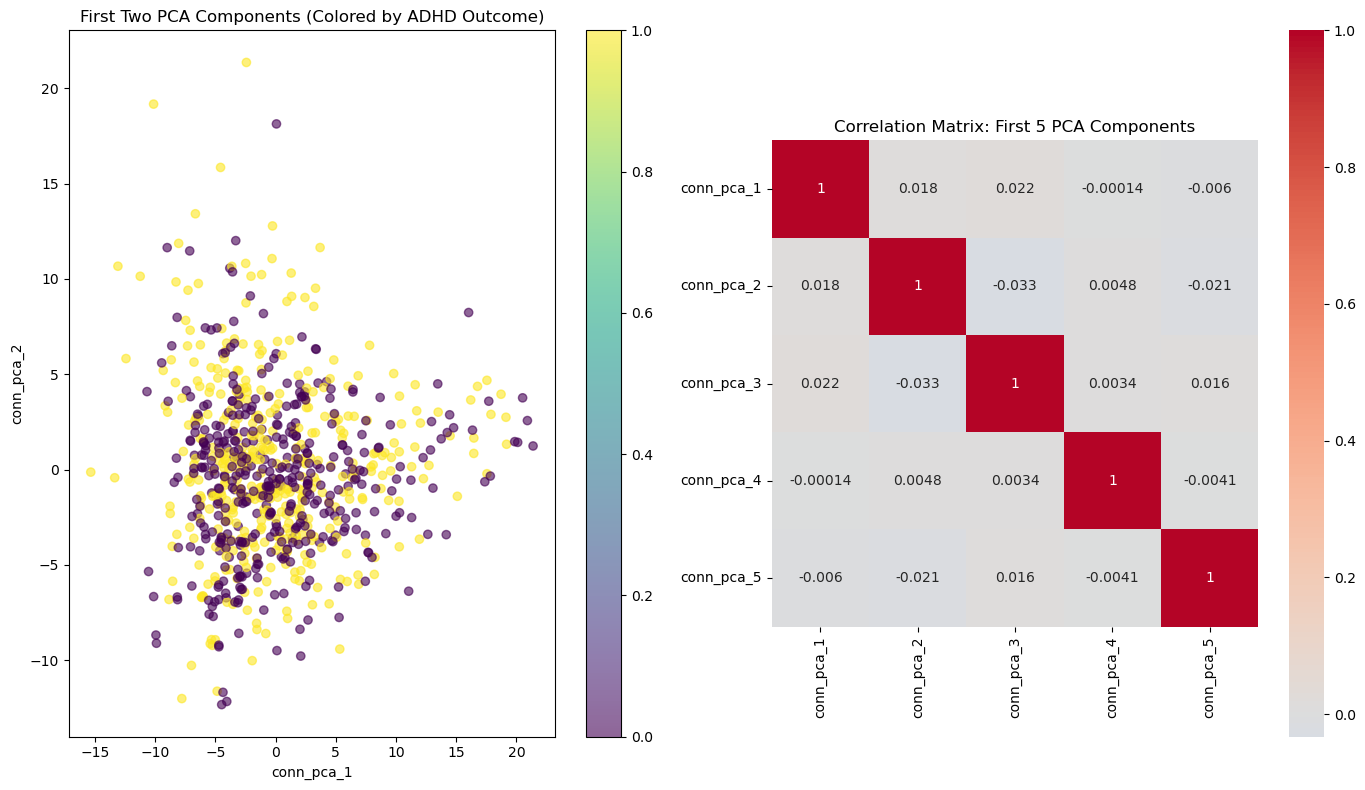


 PCA Component Statistics:
 conn_pca_1: Variance = 33.9825
 conn_pca_2: Variance = 19.3271
 conn_pca_3: Variance = 13.1012
 conn_pca_4: Variance = 12.3611
 conn_pca_5: Variance = 11.0917
 conn_pca_6: Variance = 9.9213
 conn_pca_7: Variance = 8.9402
 conn_pca_8: Variance = 8.6219
 conn_pca_9: Variance = 7.4640
 conn_pca_10: Variance = 6.6430


In [ ]:
# =============================================================================
# CONNECTOME PCA COMPONENTS ANALYSIS
# =============================================================================

def analyze_connectome_pca(df):
    """
    Analyze PCA-reduced connectome features, including:
    - Number of PCA components
    - Statistical summary (mean, std, quartiles)
    - Visualization of first two components (colored by ADHD outcome if present)
    - Correlation matrix of first few components
    - Variance of individual PCA components

    Parameters:
    -----------
    df : pd.DataFrame
        Dataset expected to include PCA components named with prefix 'conn_'.
        Optionally contains 'ADHD_Outcome' for coloring scatter plots.
    """

    # Identify PCA columns from connectome data
    pca_cols = [col for col in df.columns if col.startswith('conn_')]

    if not pca_cols:
        print("No PCA components found with prefix 'conn_'.")
        return

    print(f"Found {len(pca_cols)} PCA components from connectome data.")

    # ==============================
    # 1. Statistical Summary
    # ==============================
    print("\nPCA Components Summary Statistics:")
    print(df[pca_cols].describe().round(3))

    # ==============================
    # 2. Visualization of First Two Components
    # ==============================
    if len(pca_cols) >= 2:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Scatter Plot: First two PCA components
        if 'ADHD_Outcome' in df.columns:
            scatter = axes[0].scatter(
                df[pca_cols[0]], df[pca_cols[1]],
                c=df['ADHD_Outcome'], cmap='viridis', alpha=0.6
            )
            plt.colorbar(scatter, ax=axes[0], label='ADHD Outcome')
        else:
            axes[0].scatter(df[pca_cols[0]], df[pca_cols[1]], alpha=0.6)

        axes[0].set_xlabel(pca_cols[0])
        axes[0].set_ylabel(pca_cols[1])
        axes[0].set_title('First Two PCA Components')

        # Correlation Matrix for first few PCA components
        n_components = min(5, len(pca_cols))
        corr_matrix = df[pca_cols[:n_components]].corr()

        sns.heatmap(
            corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, ax=axes[1]
        )
        axes[1].set_title(f'Correlation Matrix (First {n_components} PCA Components)')

        plt.tight_layout()
        plt.show()

    # ==============================
    # 3. Variance of PCA Components
    # ==============================
    print("\nPCA Component Variances:")
    for col in pca_cols[:10]:  # First 10 for readability
        print(f"  {col}: Variance = {df[col].var():.4f}")
analyze_connectome_pca(df)

ADHD OUTCOME AND SEX DISTRIBUTION ANALYSIS
ADHD Outcome Distribution:
  No ADHD: 408 (50.1%)
  ADHD: 407 (49.9%)

Sex Distribution by ADHD Status:
ADHD_Label  ADHD  No ADHD
Sex_Label                
Female       286      199
Male         121      112

Percentages within each sex:
ADHD_Label  ADHD  No ADHD
Sex_Label                
Female      59.0     41.0
Male        51.9     48.1


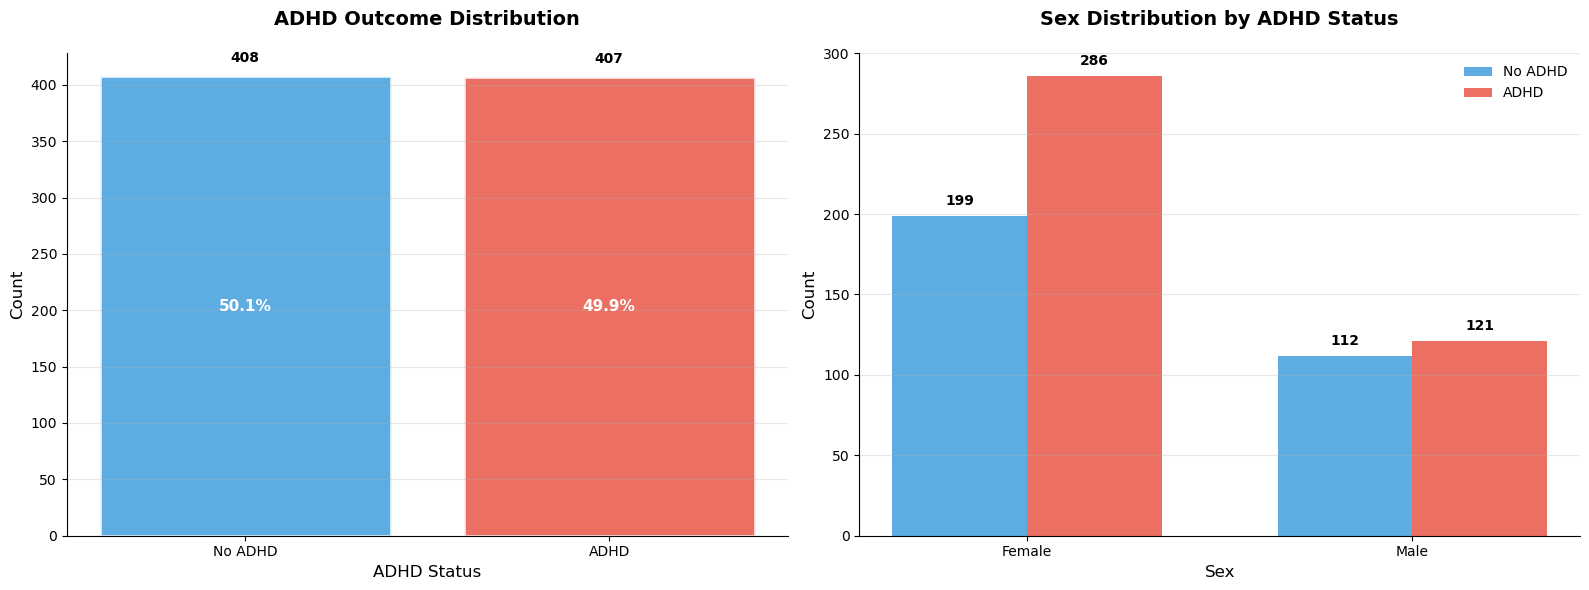


STATISTICAL SUMMARY
Chi-square test for independence:
  Chi-square statistic: 2.8948
  p-value: 0.0889
  Degrees of freedom: 1
  Result: No significant association between sex and ADHD (p >= 0.05)


In [ ]:
# =============================================================================
# SIMPLIFIED SEX COLUMN DETECTION - SINCE YOU KNOW IT'S 'Sex_F'
# =============================================================================

def analyze_adhd_and_sex_distribution(df):
    """
    Visualize and analyze ADHD outcome distribution and its relationship with sex.
    """

    print("ADHD OUTCOME AND SEX DISTRIBUTION ANALYSIS")
    print("=" * 50)
    
    # Set consistent visual style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create two subplots (side-by-side): ADHD outcome + Sex by ADHD
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Define color palettes
    adhd_colors = ['#3498db', '#e74c3c']  # Blue = No ADHD, Red = ADHD

    # =========================================================================
    # 1. ADHD OUTCOME DISTRIBUTION (same as before)
    # =========================================================================
    if 'ADHD_Outcome' in df.columns:
        adhd_counts = df['ADHD_Outcome'].value_counts().sort_index()
        
        bars1 = axes[0].bar(
            ['No ADHD', 'ADHD'],
            adhd_counts.values,
            color=adhd_colors,
            alpha=0.8,
            edgecolor='white',
            linewidth=2
        )
        
        axes[0].set_title('ADHD Outcome Distribution', fontsize=14, fontweight='bold', pad=20)
        axes[0].set_ylabel('Count', fontsize=12)
        axes[0].set_xlabel('ADHD Status', fontsize=12)
        
        # Add counts above bars
        for bar, count in zip(bars1, adhd_counts.values):
            height = bar.get_height()
            axes[0].text(bar.get_x() + bar.get_width() / 2, height + 10,
                         f'{count}', ha='center', va='bottom', fontweight='bold')
        
        # Add percentage labels inside bars
        total = adhd_counts.sum()
        for bar, count in zip(bars1, adhd_counts.values):
            percentage = (count / total) * 100
            axes[0].text(bar.get_x() + bar.get_width() /